In [ ]:
def googlemount() :
  from google.colab import drive
  drive.mount('/content/drive')

In [ ]:
def roboflow():
  %cd /content
  %pip install roboflow
  from roboflow import Roboflow
  rf = Roboflow(api_key="p3RMuEsJNOEMNY02vVFN")
  project = rf.workspace("csgo-head-detection").project("head-datasets")
  dataset = project.version(2).download("yolov5")

In [ ]:
def Data_path() :
  import glob
  DATA_PATH = '/content/Head-datasets-2/'
  TRAIN_PATH = '/content/Head-datasets-2/train/'
  TEST_PATH = '/content/Head-datasets-2/test/'
  train_image_list = glob.glob(TRAIN_PATH+'/images/*.jpg')
  test_image_list = glob.glob(TEST_PATH +'/images/*.jpg')

  with open(DATA_PATH + '/train.txt', 'w') as f:
    f.write('\n'.join(train_image_list) + '\n')

  with open(DATA_PATH + '/test.txt', 'w') as f:
      f.write('\n'.join(test_image_list) + '\n')

  with open(DATA_PATH + '/test.txt', 'r') as f:
    a = f.readlines()

  import yaml

  with open("/content/Head-datasets-2/data.yaml",'r') as f :
    data = yaml.load(f, Loader=yaml.FullLoader)

  data['train'] = '/content/Head-datasets-2/train.txt'
  data['val'] = '/content/Head-datasets-2/test.txt'
  # 변경된 'data' dictionary 를 Yaml 파일로 변경하여 저장 
  with open(DATA_PATH + '/data.yaml', 'w') as f:
    yaml.dump(data, f)

In [ ]:
def yolov5() :
  !git clone https://github.com/ultralytics/yolov5
  %cd /content/yolov5
  !pip install -r requirements.txt 
  %cd /content/yolov5

def yolov5_train() :이후
  !python train.py\
    --img 640\
    --batch 24\
    --epochs 10\
    --data /content/Head-datasets-2/data.yaml\
    --weights yolov5l.pt\
    --name test_set\

def yolov5_detect() :
  !python detect.py\
    --source /content/drive/MyDrive/KTAivle/F2016032111235222067202727.png\
    --weights /content/yolov5/runs/train/test_set/weights/best.pt\
    --save-txt\
    --save-conf\
    --img 640\
    --conf 0.3\
    --exist-ok\
    --line-thickness 1

In [ ]:
def label_txt(label_path) :
  import pandas as pd
  import cv2

  img = cv2.imread("/content/drive/MyDrive/test_img/04.png") 
  data2 = pd.read_csv(label_path, sep=' ')
  data2.columns = ['0','x0','x1','x2','x3','x4']
  data2.drop('0',axis=1, inplace=True)
  data2.drop('x4',axis=1, inplace=True)
  data2.columns = ['x','y','width','height']
  data2['x_c'] = data2['x'] *img.shape[1]
  data2['y_c'] = data2['y'] *img.shape[0]
  data2['box_w'] = data2['width'] *img.shape[1]
  data2['box_h'] = data2['height'] *img.shape[0]
  data2['left_box_x'] = data2['x_c'] - (data2['box_w']/2)
  data2['right_box_x'] = data2['x_c'] + (data2['box_w']/2)
  data2['left_box_y'] = data2['y_c'] - (data2['box_h']/2)
  data2['right_box_y'] = data2['y_c'] + (data2['box_h']/2)
  return data2

def img_read(img_path) :
  import cv2
  from google.colab.patches import cv2_imshow

  img = cv2.imread(img_path) 

  cv2_imshow(img)


def img_line() :
  green = (0, 255, 0)
  data2 = label_txt("/content/yolov5/runs/detect/exp/labels/F2016032111235222067202727.txt")
  img = img_read('/content/yolov5/runs/detect/exp/F2016032111235222067202727.png')
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['right_box_y'].max())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), green,5) # 위
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].min())), green,5) # 아래
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['left_box_x'].min()), int(data2['right_box_y'].max())), green,5) #좌
  cv2.line(img, (int(data2['right_box_x'].max()),int(data2['right_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), green,5) #우

  cv2_imshow(img)

In [ ]:
googlemount()
roboflow()
Data_path()
yolov5()

In [ ]:
yolov5_train()
yolov5_detect()
data2 = pd.dataframe(label_txt("/content/yolov5/runs/detect/exp/labels/F2016032111235222067202727.txt"))
img = img_read('/content/yolov5/runs/detect/exp/F2016032111235222067202727.png')

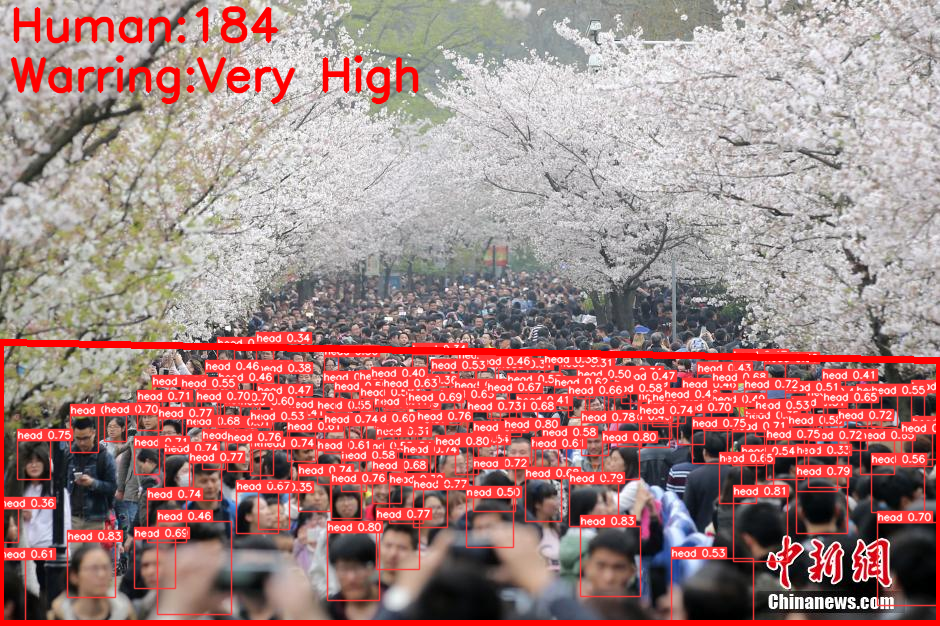

In [ ]:
green = (0, 255, 0)
red= (0, 0, 255)
blue = (255,0,0)
yellow = (0,255,255)
cnt = data2.shape[0]

if cnt < 50 :
  img = cv2.imread("/content/drive/MyDrive/test_img/04.png")
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['right_box_y'].max())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), blue,5) # 위
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].min())), blue,5) # 아래

  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['left_box_x'].min()), int(data2['right_box_y'].max())), blue,5) #좌

  cv2.line(img, (int(data2['right_box_x'].max()),int(data2['right_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), blue,5) #우



  red= (0, 0, 255)
  font =  cv2.FONT_HERSHEY_SIMPLEX 
  green = (0, 255, 0)
  txt = cv2.putText(img, f"Human:{cnt}", (10, 40), font, 1.5, blue, 3, cv2.LINE_AA)
  txt2 = cv2.putText(img, "Warring:Low", (10, 90), font, 1.5, blue, 3, cv2.LINE_AA)

elif cnt < 100 :
  img = cv2.imread("/content/drive/MyDrive/test_img/04.png")
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['right_box_y'].max())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), green,5) # 위
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].min())), green,5) # 아래

  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['left_box_x'].min()), int(data2['right_box_y'].max())), green,5) #좌

  cv2.line(img, (int(data2['right_box_x'].max()),int(data2['right_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), green,5) #우




  red= (0, 0, 255)
  font =  cv2.FONT_HERSHEY_SIMPLEX 
  green = (0, 255, 0)
  txt = cv2.putText(img, f"Human:{cnt}", (10, 40), font, 1.5, green, 3, cv2.LINE_AA)
  txt2 = cv2.putText(img, "Warring:Mid", (10, 90), font, 1.5, green, 3, cv2.LINE_AA)


elif cnt < 150 :
  img = cv2.imread("/content/drive/MyDrive/test_img/04.png")
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['right_box_y'].max())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), yellow,5) # 위
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].min())), yellow,5) # 아래

  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['left_box_x'].min()), int(data2['right_box_y'].max())), yellow,5) #좌

  cv2.line(img, (int(data2['right_box_x'].max()),int(data2['right_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), yellow,5) #우




  red= (0, 0, 255)
  font =  cv2.FONT_HERSHEY_SIMPLEX 
  green = (0, 255, 0)
  txt = cv2.putText(img, f"Human:{cnt}", (10, 40), font, 1.5, yellow, 3, cv2.LINE_AA)
  txt2 = cv2.putText(img, "Warring:High", (10, 90), font, 1.5, yellow, 3, cv2.LINE_AA)

else :
  img = cv2.imread("/content/drive/MyDrive/test_img/04.png")
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['right_box_y'].max())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), red,5) # 위
  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].min())), red,5) # 아래

  cv2.line(img, (int(data2['left_box_x'].min()),int(data2['left_box_y'].min())), (int(data2['left_box_x'].min()), int(data2['right_box_y'].max())), red,5) #좌

  cv2.line(img, (int(data2['right_box_x'].max()),int(data2['right_box_y'].min())), (int(data2['right_box_x'].max()), int(data2['right_box_y'].max())), red,5) #우




  red= (0, 0, 255)
  font =  cv2.FONT_HERSHEY_SIMPLEX 
  green = (0, 255, 0)
  txt = cv2.putText(img, f"Human:{cnt}", (10, 40), font, 1.5, red, 3, cv2.LINE_AA)
  txt2 = cv2.putText(img, "Warring:Very High", (10, 90), font, 1.5, red, 3, cv2.LINE_AA)

cv2_imshow(img)